### Jupyter notebook scripts to help load and process the data in this Google Drive
### Associated with IEEE Access Paper "Multi-Source Feature Fusion for Object Detection Association in Connected Vehicle Environments"

In [1]:
#loading libraries

import matplotlib.pyplot as plt
import numpy as np

import torch
import os
import cv2

### Part 1 Synthetic Data

#### All labels and images are located in associated files in the google drive
#### The training set was split into 7 folders to reduce download/upload time and prevent timeouts; testing data is in one folder

In [2]:
source_data_dir = "" #put the path to the data directory
filename = "" #put the filename of the specific data file you want to explore
#see example below

source_data_dir = "../../../data/carla/collaborative_perception/labeled_data/carla_data_autolabel_v4_test/"
filename = "episode_9_timestep_9_b8"
data_dir = source_data_dir + filename + "/" + filename + "_labels.npy"

In [3]:
data = np.load(data_dir)
print(data.shape)
print(data)
#format of the data
#column 1 is the source vehicle number 
#column 2 is the detected vehicle number 
#column 3 is the detected vehicle label
#column 4 is the detected vehicle estimated x position
#column 5 is the detected vehicle estimated x position

(26, 5)
[[  0.           0.           2.         -74.05011055  -1.98939576]
 [  0.           1.           9.         -80.64611517  -9.35661659]
 [  0.           2.           9.         -80.67297854  -9.32207661]
 [  1.           0.          11.         -88.07498719  -9.38650176]
 [  1.           1.           7.         -85.81286777   0.41939081]
 [  1.           2.           2.         -76.53130565  -2.1214862 ]
 [  1.           3.          11.         -91.84513018  -9.06794217]
 [  2.           0.           7.         -79.89040584  -0.69233958]
 [  3.           0.           0.         -67.25875114  -2.87552742]
 [  3.           1.           9.         -79.90570837 -12.99623032]
 [  3.           2.           9.         -79.8459453  -13.06730228]
 [  3.           3.           9.         -81.14456789 -11.35599764]
 [  3.           4.           8.         -81.47249906 -17.5790092 ]
 [  7.           0.           2.         -82.39040475  -0.41198236]
 [  8.           0.           2.        

In [4]:
#in the previous cell, we loaded and displayed the data for 1 frame in the default format
#in this  cell, we will convert this data into binary labels

#the binary label format will consider each row combination and provide a binary label
#the label is "True" if both rows represent detections of the same vehicle
#the label is "False" if both rows represent detections of different vehicles

binary_labels = []

for i in range (0,data.shape[0]):
    for j in range(i+1, data.shape[0]):
        binary_labels.append([data[i,0],data[i,1],data[j,0],data[j,1],(data[i,2]==data[j,2])])
        
print(len(binary_labels))
print(binary_labels[0])
print(binary_labels[1])
print(binary_labels[2])
print(binary_labels[3])
print(binary_labels[4])
print(binary_labels[5])

#format of the binary label data
#column 1 is the source vehicle A number 
#column 2 is the detected vehicle A number 
#column 3 is the source vehicle B number 
#column 4 is the detected vehicle B number
#column 5 is True/False depending on is the label for detected vehilce A&B is the same or different
        

325
[0.0, 0.0, 0.0, 1.0, False]
[0.0, 0.0, 0.0, 2.0, False]
[0.0, 0.0, 1.0, 0.0, False]
[0.0, 0.0, 1.0, 1.0, False]
[0.0, 0.0, 1.0, 2.0, True]
[0.0, 0.0, 1.0, 3.0, False]


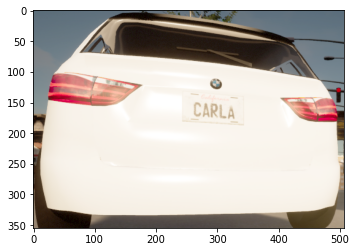

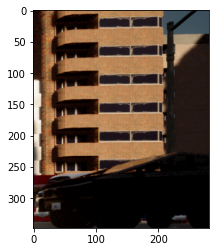

In [5]:
im1_dir = source_data_dir + filename+ "/" + filename + "_" + str(int(binary_labels[0][0])) + "_" + str(int(binary_labels[0][1])) + ".png"
im1 = cv2.imread(im1_dir)
plt.imshow(im1)
plt.show()

im2_dir = source_data_dir + filename+ "/" + filename + "_" + str(int(binary_labels[0][2])) + "_" + str(int(binary_labels[0][3])) + ".png"
im2 = cv2.imread(im2_dir)
plt.imshow(im2)
plt.show()

#example showing how to load and display images
#this example is showing a case of a False binary label, as the images are of different vehicles


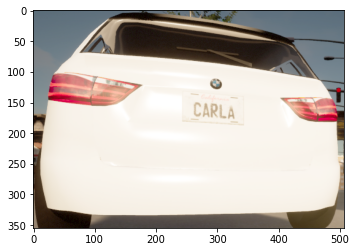

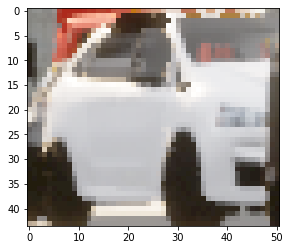

In [6]:
im1_dir = source_data_dir + filename+ "/" + filename + "_" + str(int(binary_labels[4][0])) + "_" + str(int(binary_labels[4][1])) + ".png"
im1 = cv2.imread(im1_dir)
plt.imshow(im1)
plt.show()

im2_dir = source_data_dir + filename+ "/" + filename + "_" + str(int(binary_labels[4][2])) + "_" + str(int(binary_labels[4][3])) + ".png"
im2 = cv2.imread(im2_dir)
plt.imshow(im2)
plt.show()

#example showing how to load and display images
#this example is showing a case of a True binary label, as the images are of the same vehicle

### Part 2 Real World Data
#### Images are located in different directories than the labels

In [7]:
source_data_dir = "" #put the path of the label file directory
filename = "" #put the label file name
#example below

source_data_dir = "/home/sjthornt/hydra/training_data"
filename = "NN_train_set_2view.npy"

dataset_dir = source_data_dir + "/" + filename

In [8]:
#example showing the data label format
#all labels are already in binary format

data = np.load(dataset_dir)
print(data[0:20,:])

#column 1 - image from camera A
#column 2 - image from camera B
#column 3 - binary label

[['3_20_far1_001422_3.png' '3_20_street1_001422_1.png' '0']
 ['4_15_far1_000184_0.png' '4_15_street1_000184_0.png' '0']
 ['far_left1_000284_0.png' 'street_left1_000284_0.png' '0']
 ['3_20_far2_000020_2.png' '3_20_street2_000020_0.png' '0']
 ['far_left1_000572_1.png' 'street_left1_000572_0.png' '0']
 ['4_15_far3_000054_2.png' '4_15_street3_000054_1.png' '0']
 ['002445rgb_0.png' '002578rgb_0.png' '1']
 ['3_20_far2_000502_1.png' '3_20_street2_000502_0.png' '1']
 ['4_15_far3_000430_0.png' '4_15_street3_000430_0.png' '0']
 ['3_20_far1_000466_1.png' '3_20_street1_000466_0.png' '1']
 ['3_20_far1_000758_1.png' '3_20_street1_000758_2.png' '1']
 ['4_15_far2_000110_2.png' '4_15_street2_000110_1.png' '0']
 ['4_15_far3_000054_1.png' '4_15_street3_000054_0.png' '0']
 ['002970rgb_0.png' '003103rgb_2.png' '0']
 ['4_15_far1_000106_0.png' '4_15_street1_000106_1.png' '1']
 ['3_20_far1_000992_2.png' '3_20_street1_000992_0.png' '0']
 ['3_20_far1_000112_1.png' '3_20_street1_000112_1.png' '0']
 ['4_15_far4_0

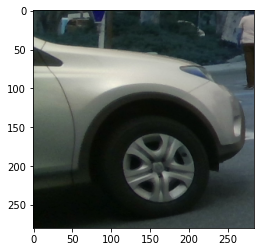

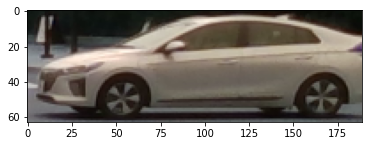

In [9]:
im_dir_a = "roi_far_7_16"
im_dir_b = "roi_street_7_16"

im1_dir = source_data_dir + "/" + im_dir_a + "/" + data[0,0]
im1 = cv2.imread(im1_dir)
plt.imshow(im1)
plt.show()

im2_dir = source_data_dir + "/" + im_dir_b + "/" + data[0,1]
im2 = cv2.imread(im2_dir)
plt.imshow(im2)
plt.show()

#example showing how to load and display images
#this example is showing a case of a False binary label, as the images are of different vehicles

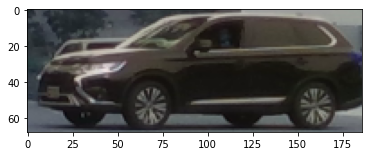

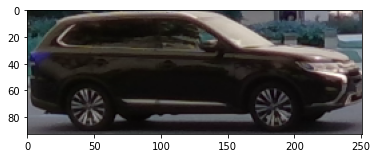

In [10]:
im_dir_a = "roi_far_7_16"
im_dir_b = "roi_street_7_16"

im1_dir = source_data_dir + "/" + im_dir_a + "/" + data[7,0]
im1 = cv2.imread(im1_dir)
plt.imshow(im1)
plt.show()

im2_dir = source_data_dir + "/" + im_dir_b + "/" + data[7,1]
im2 = cv2.imread(im2_dir)
plt.imshow(im2)
plt.show()

#example showing how to load and display images
#this example is showing a case of a True binary label, as the images are of the same vehicle